In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import dates

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import and sort QUARTERLY dataset (Take columns in EUR, drop NAs)

In [3]:
df_credit_ratio = pd.read_excel(r"C:\Users\TEA\Desktop\tea\INSIDER ID\mkd_data_python.xlsx", sheet_name = "gdp_credit_ratio_Y")

In [4]:
df_credit_ratio

,year,gdp,gdp_percent,Total loans,total_loans_percent,household_loans,household_loans_percentOf_gdp,corporate_loans,corporate_loans_percentOf_gdp
0,2019,11242.036204,95.775250,5297.792243,47.124846,2650.158048,23.573648,2647.634195,23.551198
1,2020,10645.562327,90.693658,5640.053226,52.980322,2898.213530,27.224617,2741.839696,25.755706
2,2021,11737.934640,100.000000,5971.864311,50.876619,3130.407403,26.669150,2841.456908,24.207469


In [5]:
df_Q = pd.read_excel(r"C:\Users\TEA\Desktop\tea\INSIDER ID\mkd_data_python.xlsx", sheet_name = "gdp_credit_q", index_col = 0, parse_dates = True)
df_Q.index.freq = "Q"

In [6]:
df_Q.head()

,Year/Q,Year,GDP in MKD,GDP in EUR,GDP growth (on corresponding Q),Average of credit_corporate MKD,Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household MKD,Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,,,,,
2000-03-31,2000Q1,2000,54631,886.644655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,2000Q2,2000,63879,1036.736907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,2000Q3,2000,62788,1019.030306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,2000Q4,2000,67348,1093.037731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,2001Q1,2001,59975,973.376164,9.781992,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_MK_Q = df_Q.drop(["GDP in MKD","Average of credit_corporate MKD","Average of credit_household MKD"], axis = 1)

In [8]:
df_MK_Q.dropna(inplace = True)

In [9]:
df_MK_Q.head()  ## ---> Data is in EUR only

,Year/Q,Year,GDP in EUR,GDP growth (on corresponding Q),Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,,
2010-03-31,2010Q1,2010,1601.806317,6.394722,1796.181030,3.959194,1139.468842,0.916340
2010-06-30,2010Q2,2010,1754.706306,5.117984,1842.035663,5.873284,1163.896756,2.415735
2010-09-30,2010Q3,2010,1859.160645,8.887579,1877.745111,8.721245,1190.693070,4.182845
2010-12-31,2010Q4,2010,1881.525170,1.870793,1903.269720,8.732131,1207.608528,5.596308
2011-03-31,2011Q1,2011,1681.932338,5.002229,1941.241750,8.076063,1213.649492,6.510108


## Import and sort YEARLY dataset (Take columns in EUR, drop NAs)

In [10]:
df_Y = pd.read_excel(r"C:\Users\TEA\Desktop\tea\INSIDER ID\mkd_data_python.xlsx", sheet_name = "gdp_credit_Y")

In [11]:
df_Y.head()

,Year,GDP_eur,GDP_mkd,Yearly growth,Average of credit_corporate EUR,Average of credit_corporate MKD,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,Average of credit_household MKD,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
0,2000,4035.449598,248646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,4096.262278,252393.0,1.506962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,4196.691652,258581.0,2.451732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,4360.806363,268693.0,3.910573,547.855110,33756.333333,NaN,12.563161,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,4557.088336,280787.0,4.501048,632.890615,38995.833333,15.521532,13.888048,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_MK_Y = df_Y.drop(["GDP_mkd","Average of credit_corporate MKD","Average of credit_household MKD"], axis = 1)

In [13]:
df_MK_Y.dropna(inplace = True)

In [14]:
df_MK_Y.reset_index(drop = True, inplace = True)

In [15]:
df_MK_Y.head() ## --> Data is in EUR

,Year,GDP_eur,Yearly growth,Average of credit_corporate EUR,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
0,2010,7097.198439,5.468837,1854.807881,6.825865,26.134367,1175.416799,3.286536,16.561701,42.696068,3030.224680
1,2011,7533.598800,6.148910,2010.638047,8.401418,26.688945,1264.684401,7.594549,16.787254,43.476200,3275.322448
2,2012,7574.448951,0.542240,2155.623610,7.210923,28.459148,1357.473238,7.336916,17.921743,46.380890,3513.096849
3,2013,8145.539580,7.539699,2202.107860,2.156418,27.034524,1465.089055,7.927657,17.986397,45.020921,3667.196916
4,2014,8563.292017,5.128604,2342.415010,6.371493,27.354141,1636.409563,11.693522,19.109585,46.463726,3978.824573


## TOTAL HOUSEHOLD LOANS 2010 - 2021 quarterly

In [16]:
df_MK_Q.head()

,Year/Q,Year,GDP in EUR,GDP growth (on corresponding Q),Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,,
2010-03-31,2010Q1,2010,1601.806317,6.394722,1796.181030,3.959194,1139.468842,0.916340
2010-06-30,2010Q2,2010,1754.706306,5.117984,1842.035663,5.873284,1163.896756,2.415735
2010-09-30,2010Q3,2010,1859.160645,8.887579,1877.745111,8.721245,1190.693070,4.182845
2010-12-31,2010Q4,2010,1881.525170,1.870793,1903.269720,8.732131,1207.608528,5.596308
2011-03-31,2011Q1,2011,1681.932338,5.002229,1941.241750,8.076063,1213.649492,6.510108


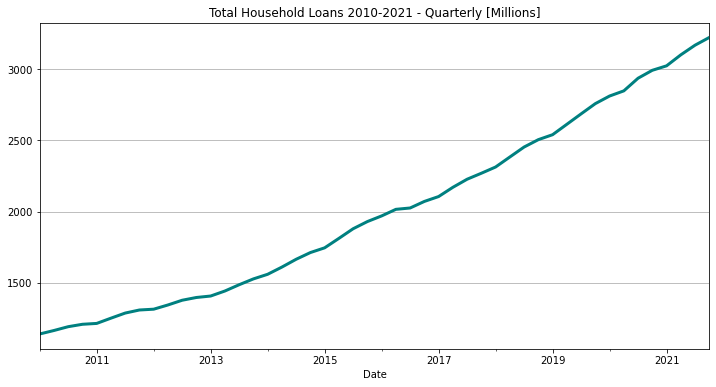

In [17]:
plt.title("Total Household Loans 2010-2021 - Quarterly [Millions]")
ax_H =df_MK_Q["Average of credit_household EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "teal", lw = 3)
ax_H.autoscale(axis = "x", tight = True)

ax_H.yaxis.grid(True)

## TOTAL HOUSEHOLD LOANS 2010 - 2021 yearly

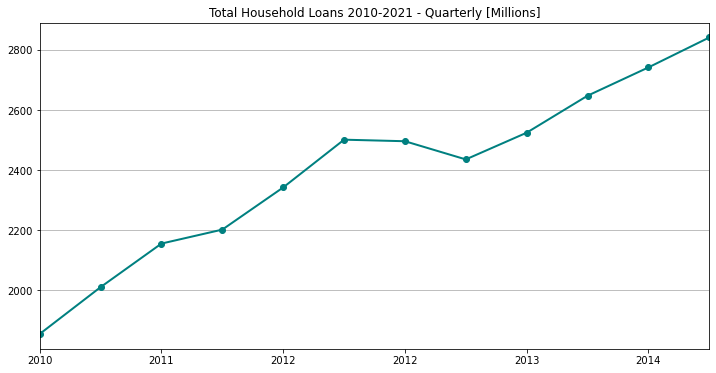

In [18]:
plt.title("Total Household Loans 2010-2021 - Quarterly [Millions]")
xl = ["2010","2011","2012","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
ax_H =df_MK_Y["Average of credit_corporate EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "teal", lw = 2, marker = "o")
ax_H.autoscale(axis = "x", tight = True)
ax_H.set_xticklabels(xl)
ax_H.yaxis.grid(True)


## TOTAL CORPORATE LOANS 2010 - 2021 quarterly

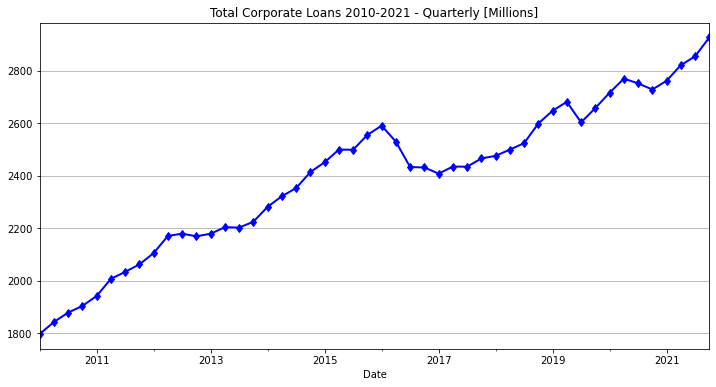

In [19]:
plt.title("Total Corporate Loans 2010-2021 - Quarterly [Millions]")
ax_H =df_MK_Q["Average of credit_corporate EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "b", lw= 2, marker = "d")

ax_H.yaxis.grid(True)


## TOTAL CORPORATE LOANS 2010 - 2021 yearly

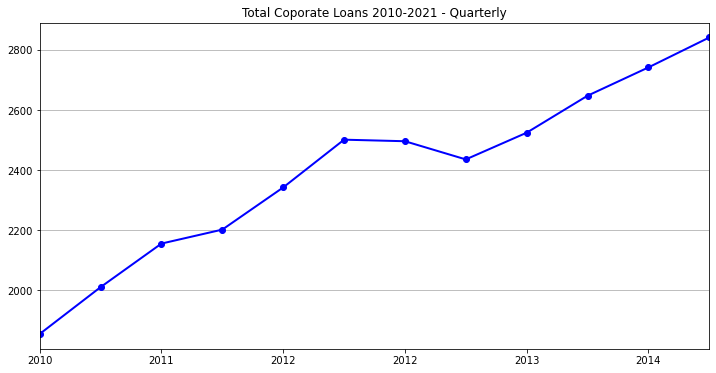

In [20]:
plt.title("Total Coporate Loans 2010-2021 - Quarterly")
xl = ["2010","2011","2012","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
ax_H =df_MK_Y["Average of credit_corporate EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "b", lw = 2, marker = "o")
ax_H.autoscale(axis = "x", tight = True)
ax_H.set_xticklabels(xl)
ax_H.yaxis.grid(True)


## TOTAL CORPORATE & HOUSEHOLD LOANS

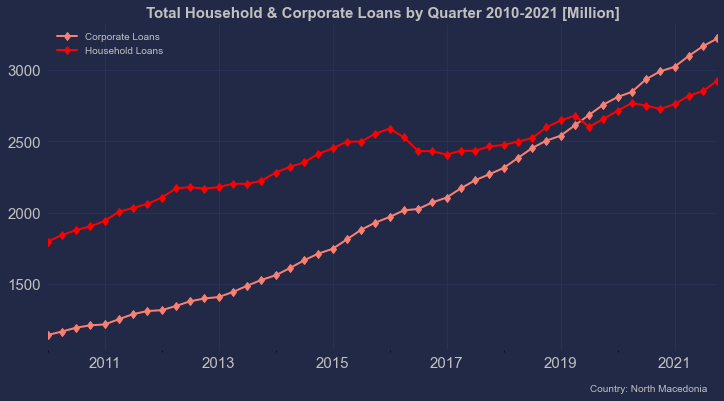

In [21]:
fig = plt.figure()
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 0, direction= 'out')
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 0)
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('silver')
ax.title.set_color("silver")

ax.spines[["top","right","left","bottom"]].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


plt.style.use("seaborn-dark")

df_MK_Q["Average of credit_household EUR"].rename("Corporate Loans").plot(legend = True, figsize = (12,6), c= "salmon", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold');
df_MK_Q["Average of credit_corporate EUR"].rename("Household Loans").plot(legend = True, figsize = (12,6), c= "red", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold');
plt.grid(axis = "both", color = "#2A3459")

leg = plt.legend(loc='upper left',prop={'size': 10}) 
for text in leg.get_texts():
    text.set_color("silver")

plt.text(198.05, 740, "Country: North Macedonia", color = "silver")
plt.show()
#fig.savefig("C_H_Loans_GDP7.png")

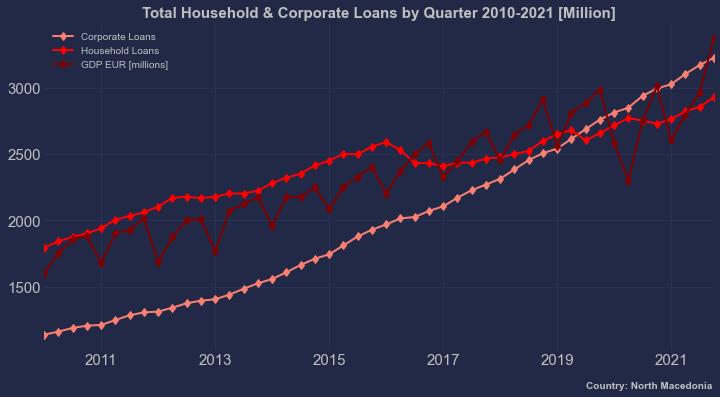

In [22]:
fig = plt.figure()
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 0)
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 0)
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('silver')
ax.title.set_color("silver")


plt.style.use("seaborn-dark")

df_MK_Q["Average of credit_household EUR"].rename("Corporate Loans").plot(legend = True, figsize = (12,6), c= "salmon", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_MK_Q["Average of credit_corporate EUR"].rename("Household Loans").plot(legend = True, figsize = (12,6), c= "red", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_MK_Q["GDP in EUR"].rename("GDP EUR [millions]").plot(legend = True, figsize = (12,6), c= "maroon", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold', loc='center');
plt.grid(axis = "both", color = "#2A3459")

leg = plt.legend(loc='upper left',prop={'size': 10}) 
for text in leg.get_texts():
    text.set_color("silver")
    
plt.text(198.05, 740, "Country: North Macedonia", color = "silver",fontweight="bold")


plt.show()
#fig.savefig("C_H_Loans_GDP6.png")

In [23]:
df_MK_Q.head()

,Year/Q,Year,GDP in EUR,GDP growth (on corresponding Q),Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,,
2010-03-31,2010Q1,2010,1601.806317,6.394722,1796.181030,3.959194,1139.468842,0.916340
2010-06-30,2010Q2,2010,1754.706306,5.117984,1842.035663,5.873284,1163.896756,2.415735
2010-09-30,2010Q3,2010,1859.160645,8.887579,1877.745111,8.721245,1190.693070,4.182845
2010-12-31,2010Q4,2010,1881.525170,1.870793,1903.269720,8.732131,1207.608528,5.596308
2011-03-31,2011Q1,2011,1681.932338,5.002229,1941.241750,8.076063,1213.649492,6.510108


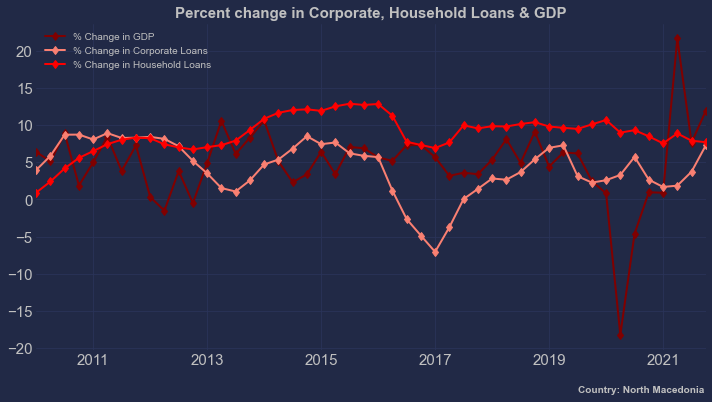

In [24]:
fig = plt.figure()
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('silver')
ax.title.set_color("silver")

plt.style.use("seaborn-dark")

df_MK_Q["GDP growth (on corresponding Q)"].rename("% Change in GDP").plot(legend = True, figsize = (12,6), c= "maroon", lw= 2, marker = "d").set_title("Percent change in Corporate, Household Loans & GDP", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_MK_Q["credit_corporate_growth (on corresponding quarter)"].rename("% Change in Corporate Loans").plot(legend = True, figsize = (12,6), c= "salmon", lw= 2, marker = "d").set_title("Percent change in Corporate, Household Loans & GDP", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_MK_Q["credit_household_growth (on corresponding quarter)"].rename("% Change in Household Loans").plot(legend = True, figsize = (12,6), c= "red", lw= 2, marker = "d").set_title("Percent change in Corporate, Household Loans & GDP", fontsize=15, color= 'silver', fontweight='bold', loc='center');
plt.grid(axis = "both", color = "#2A3459")

leg = plt.legend(loc='upper left',prop={'size': 10}) 
for text in leg.get_texts():
    text.set_color("silver")
    
plt.text(198.0, -26.05, "Country: North Macedonia", color = "silver",fontweight="bold")


plt.show()
#fig.savefig("C_H_Loans_GDP5.png")

## GDP growth on corresponding quarter changes 2019 - 2021

In [25]:
gdp_growth_2019 = df_MK_Q["31.3.2019":][["GDP growth (on corresponding Q)","Year/Q"]]

In [26]:
gdp_growth_2019

,GDP growth (on corresponding Q),Year/Q
Date,,
2019-03-31,4.424076,2019Q1
2019-06-30,6.331297,2019Q2
2019-09-30,6.193908,2019Q3
2019-12-31,2.471627,2019Q4
2020-03-31,0.823880,2020Q1
2020-06-30,-18.247998,2020Q2
2020-09-30,-4.617530,2020Q3
2020-12-31,0.962302,2020Q4
2021-03-31,0.899491,2021Q1


In [27]:
gdp_growth_2019 = pd.DataFrame(gdp_growth_2019)

Text(10.8, 12.6, '11.94%')

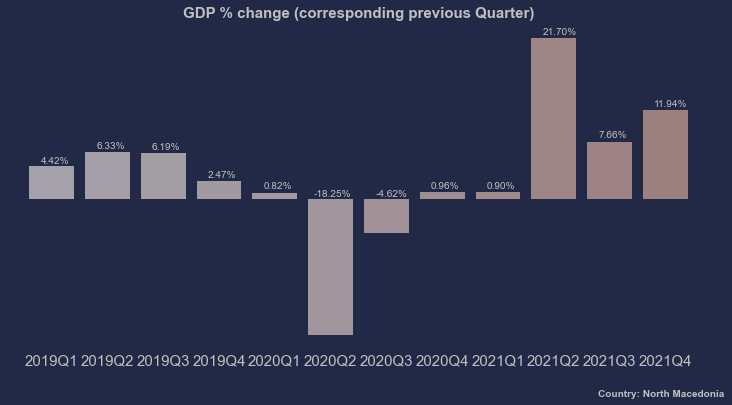

In [28]:
fig = plt.figure(figsize = (12,6))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
ax.tick_params(axis='y', colors='#212946',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")
ax.set(yticklabels=[])

title = "GDP current prices - growth"
pal1 = sns.color_palette("Reds",len("GDP growth (on corresponding Q) 2019 - 2021"))
ax = sns.barplot(x = gdp_growth_2019["Year/Q"], y = gdp_growth_2019["GDP growth (on corresponding Q)"], data = gdp_growth_2019, palette = pal1, alpha = 0.6).set_title("GDP % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');



plt.text(9.8, -26.5, "Country: North Macedonia", color = "silver",fontweight="bold")

plt.text(-0.2, 4.9, "4.42%", color = "silver")
plt.text(0.8, 6.9, "6.33%", color = "silver")
plt.text(1.8, 6.8, "6.19%", color = "silver")
plt.text(2.8, 3.0, "2.47%", color = "silver")
plt.text(3.8, 1.5, "0.82%", color = "silver")
plt.text(4.7, 0.4, "-18.25%", color = "silver")
plt.text(5.8, 0.4, "-4.62%", color = "silver")
plt.text(6.8, 1.5, "0.96%", color = "silver")
plt.text(7.8, 1.5, "0.90%", color = "silver")
plt.text(8.8, 22.3, "21.70%", color = "silver")
plt.text(9.8, 8.3, "7.66%", color = "silver")
plt.text(10.8, 12.6, "11.94%", color = "silver")





#fig.savefig("C_H_Loans_GDP4.png")

## LOANS growth on corresponding PREVIOUS quarter changes 2019 - 2021

### CORPORATE

In [29]:
CORPORATE_growth_2019 = df_MK_Q["31.3.2019":][["credit_corporate_growth (on corresponding quarter)","Year/Q"]]

In [30]:
CORPORATE_growth_2019

,credit_corporate_growth (on corresponding quarter),Year/Q
Date,,
2019-03-31,6.950937,2019Q1
2019-06-30,7.286098,2019Q2
2019-09-30,3.135896,2019Q3
2019-12-31,2.268256,2019Q4
2020-03-31,2.587170,2020Q1
2020-06-30,3.299752,2020Q2
2020-09-30,5.730585,2020Q3
2020-12-31,2.658285,2020Q4
2021-03-31,1.680212,2021Q1


In [31]:
CORPORATE_growth_2019 = pd.DataFrame(CORPORATE_growth_2019)

Text(10.8, 7.38, ' 7.28%')

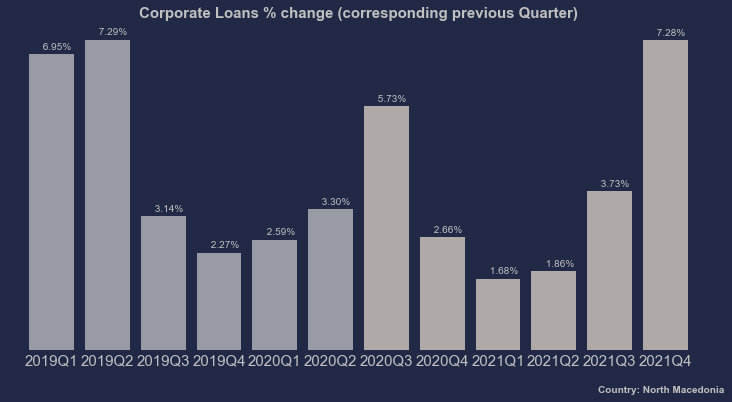

In [32]:
fig = plt.figure(figsize = (12,6))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 0)
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35)
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")
ax.set(yticklabels=[])

pal1 = sns.color_palette("Pastel2_r",len("credit_corporate_growth (on corresponding quarter)"))
ax = sns.barplot(x = CORPORATE_growth_2019["Year/Q"], y = CORPORATE_growth_2019["credit_corporate_growth (on corresponding quarter)"], data = CORPORATE_growth_2019, palette = pal1, alpha = 0.7).set_title("Corporate Loans % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');

plt.text(9.8, -1.0, "Country: North Macedonia", color = "silver",fontweight="bold")

plt.text(-0.2, 7.05, " 6.95%", color = "silver")
plt.text(0.8, 7.40, " 7.29%", color = "silver")
plt.text(1.8, 3.25, " 3.14%", color = "silver")
plt.text(2.8, 2.4, " 2.27%", color = "silver")
plt.text(3.8, 2.7, " 2.59%", color = "silver")
plt.text(4.8, 3.4, " 3.30%", color = "silver")
plt.text(5.8, 5.83, " 5.73%", color = "silver")
plt.text(6.8, 2.76, " 2.66%", color = "silver")
plt.text(7.8, 1.78, " 1.68%", color = "silver")
plt.text(8.8, 1.96, " 1.86%", color = "silver")
plt.text(9.8, 3.83, " 3.73%", color = "silver")
plt.text(10.8, 7.38, " 7.28%", color = "silver")

#fig.savefig("C_H_Loans_GDP3.png")

### HOUSEHOLD

In [33]:
HOUSEHOLD_growth_2019 = df_MK_Q["31.3.2019":][["credit_household_growth (on corresponding quarter)","Year/Q"]]

In [34]:
HOUSEHOLD_growth_2019 = pd.DataFrame(HOUSEHOLD_growth_2019)

In [35]:
HOUSEHOLD_growth_2019

,credit_household_growth (on corresponding quarter),Year/Q
Date,,
2019-03-31,9.819824,2019Q1
2019-06-30,9.643595,2019Q2
2019-09-30,9.501028,2019Q3
2019-12-31,10.105630,2019Q4
2020-03-31,10.701278,2020Q1
2020-06-30,8.995903,2020Q2
2020-09-30,9.332977,2020Q3
2020-12-31,8.496243,2020Q4
2021-03-31,7.550252,2021Q1


Text(10.8, 7.85, '7.71%')

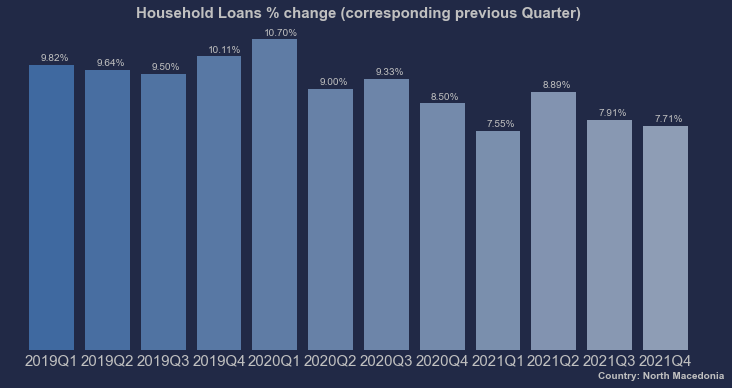

In [36]:
fig = plt.figure(figsize = (12,6))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')

ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")
ax.set(yticklabels=[])

pal1 = sns.color_palette("vlag",len("credit_household_growth (on corresponding quarter)"))
ax = sns.barplot(x = HOUSEHOLD_growth_2019["Year/Q"], y = HOUSEHOLD_growth_2019["credit_household_growth (on corresponding quarter)"], data = CORPORATE_growth_2019, palette = pal1, alpha = 0.9).set_title("Household Loans % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');

plt.text(9.8, -1.0, "Country: North Macedonia", color = "silver",fontweight="bold")

plt.text(-0.2, 9.97, "9.82%", color = "silver")
plt.text(0.8, 9.79, "9.64%", color = "silver")
plt.text(1.8, 9.65, "9.50%", color = "silver")
plt.text(2.8, 10.26, "10.11%", color = "silver")
plt.text(3.8, 10.84, "10.70%", color = "silver")
plt.text(4.8, 9.14, "9.00%", color = "silver")
plt.text(5.8, 9.47, "9.33%", color = "silver")
plt.text(6.8, 8.64, "8.50%", color = "silver")
plt.text(7.8, 7.69, "7.55%", color = "silver")
plt.text(8.8, 9.05, "8.89%", color = "silver")
plt.text(9.8, 8.07, "7.91%", color = "silver")
plt.text(10.8, 7.85, "7.71%", color = "silver")

#fig.savefig("C_H_Loans_GDP2.png")

## % CHANGE ON PREVIOUS CORRESPONDING QUARTER CORPORATE & HOUSEHOLD LOANS

In [37]:
loans_growth_2019 = df_MK_Q["31.3.2019":][["credit_household_growth (on corresponding quarter)","credit_corporate_growth (on corresponding quarter)","Year/Q"]]

In [38]:
loans_growth_2019 = pd.DataFrame(loans_growth_2019)

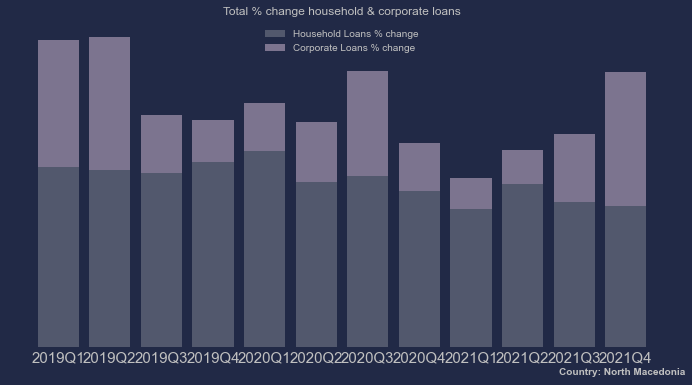

In [39]:
fig = plt.figure(figsize = (12,6))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 0)
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")
ax.set(yticklabels=[])


X = loans_growth_2019["Year/Q"]
#X = ["2019Q1",'2019Q2','2019Q3','2019Q4','2020Q1','2020Q2','2020Q3', '2020Q4','2021Q1','2021Q2', '2021Q3','2021Q4']
Y = loans_growth_2019["credit_household_growth (on corresponding quarter)"]
Z = loans_growth_2019["credit_corporate_growth (on corresponding quarter)"]
X_axis = np.arange(len(X))

# plot bars in stack manner
plt.bar(X, Y, color='lightgrey',label = 'Household Loans % change', alpha = 0.28)
plt.bar(X, Z, bottom=Y, color='thistle',label = 'Corporate Loans % change', alpha = 0.5)

plt.xticks(X_axis, X)
plt.xlabel("Year")

plt.title("Total % change household & corporate loans")
leg = plt.legend(loc=9)
for text in leg.get_texts():
  text.set_color("silver")

plt.text(9.7, -1.5, "Country: North Macedonia", color = "silver",fontweight="bold")

plt.show()
#fig.savefig("C_H_Loans_GDP1.png")

## YEARLY % LOANS FROM GDP

In [40]:
df_MK_Y.head()

,Year,GDP_eur,Yearly growth,Average of credit_corporate EUR,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
0,2010,7097.198439,5.468837,1854.807881,6.825865,26.134367,1175.416799,3.286536,16.561701,42.696068,3030.224680
1,2011,7533.598800,6.148910,2010.638047,8.401418,26.688945,1264.684401,7.594549,16.787254,43.476200,3275.322448
2,2012,7574.448951,0.542240,2155.623610,7.210923,28.459148,1357.473238,7.336916,17.921743,46.380890,3513.096849
3,2013,8145.539580,7.539699,2202.107860,2.156418,27.034524,1465.089055,7.927657,17.986397,45.020921,3667.196916
4,2014,8563.292017,5.128604,2342.415010,6.371493,27.354141,1636.409563,11.693522,19.109585,46.463726,3978.824573


In [41]:
df_MK_Y_2019 = df_MK_Y[9:]

In [42]:
df_MK_Y_2019

,Year,GDP_eur,Yearly growth,Average of credit_corporate EUR,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
9,2019,11242.036204,4.812696,2647.634195,4.875153,23.551198,2650.158048,9.769477,23.573648,47.124846,5297.792243
10,2020,10645.562327,-5.305746,2741.839696,3.558101,25.755706,2898.213530,9.360026,27.224617,52.980322,5640.053226
11,2021,11737.934640,10.261293,2841.456908,3.633225,24.207469,3130.407403,8.011621,26.669150,50.876619,5971.864311


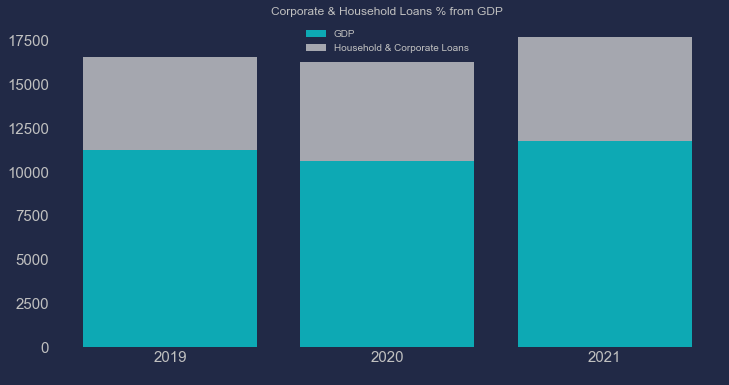

In [43]:
fig = plt.figure(figsize = (12,6))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")

X = ["2019",'2020','2021']
Y = df_MK_Y_2019["GDP_eur"]
Z = df_MK_Y_2019["yearly_total_loans(C+H) EUR"]

X_axis = np.arange(len(X))

# plot bars in stack manner
plt.bar(X, Y, color='cyan',label = 'GDP', alpha = 0.6)
plt.bar(X, Z, bottom=Y, color='lightgrey',label = 'Household & Corporate Loans', alpha = 0.75)


plt.xticks(X_axis, X)
plt.xlabel("Year")

plt.title("Corporate & Household Loans % from GDP")
leg = plt.legend(loc=9)
for text in leg.get_texts():
  text.set_color("silver")


plt.show()

In [44]:
df_credit_ratio

,year,gdp,gdp_percent,Total loans,total_loans_percent,household_loans,household_loans_percentOf_gdp,corporate_loans,corporate_loans_percentOf_gdp
0,2019,11242.036204,95.775250,5297.792243,47.124846,2650.158048,23.573648,2647.634195,23.551198
1,2020,10645.562327,90.693658,5640.053226,52.980322,2898.213530,27.224617,2741.839696,25.755706
2,2021,11737.934640,100.000000,5971.864311,50.876619,3130.407403,26.669150,2841.456908,24.207469


In [45]:
df_credit_ratio2 = df_credit_ratio[["year","gdp","household_loans","corporate_loans"]]

In [46]:
df_credit_ratio

,year,gdp,gdp_percent,Total loans,total_loans_percent,household_loans,household_loans_percentOf_gdp,corporate_loans,corporate_loans_percentOf_gdp
0,2019,11242.036204,95.775250,5297.792243,47.124846,2650.158048,23.573648,2647.634195,23.551198
1,2020,10645.562327,90.693658,5640.053226,52.980322,2898.213530,27.224617,2741.839696,25.755706
2,2021,11737.934640,100.000000,5971.864311,50.876619,3130.407403,26.669150,2841.456908,24.207469


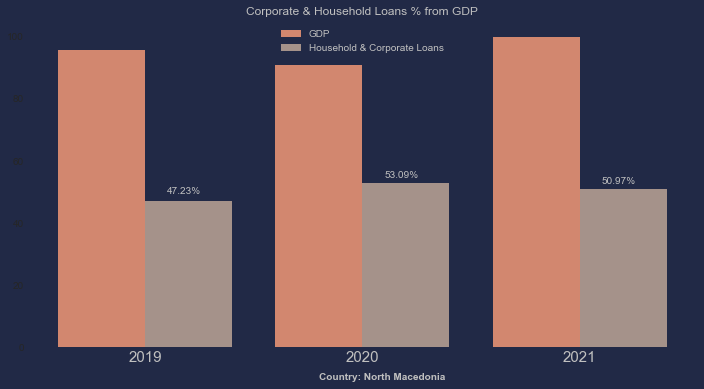

In [47]:
fig = plt.figure(figsize = (12,6))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")

X = ["2019",'2020','2021']
Y = df_credit_ratio["gdp_percent"]
Z = df_credit_ratio["total_loans_percent"]


X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'GDP', color = "lightsalmon",alpha = 0.8)
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Household & Corporate Loans', color = "peachpuff", alpha = 0.6)

plt.xticks(X_axis, X)
plt.xlabel("Year")

plt.title("Corporate & Household Loans % from GDP")
leg = plt.legend(loc=9)
for text in leg.get_texts():
  text.set_color("silver")

plt.text(0.1, 49.5, "47.23%", color = "silver")
plt.text(1.1, 54.5, "53.09%", color = "silver")
plt.text(2.1, 52.5, "50.97%", color = "silver")

plt.text(0.8, -10.5, "Country: North Macedonia", color = "silver",fontweight="bold")

plt.show()
#fig.savefig("C_H_Loans_GDP.png")

## PIE CHART - loans and corporate credit as percent of gdp - sub credits for each

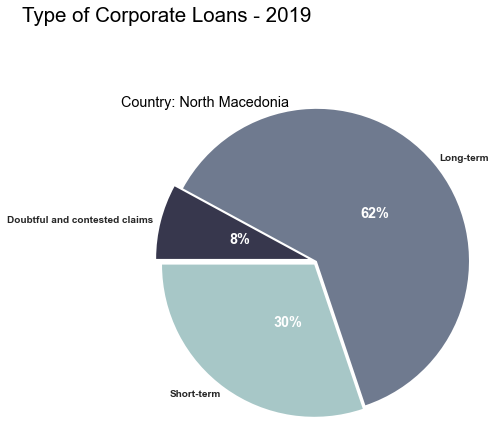

In [48]:
y = np.array([789.13, 1619.54, 207.06])
mylabels = ["Short-term", "Long-term", "Doubtful and contested claims"]

plt.figure(figsize = (3,2))
explode = (0.1, 0.0, 0.2)


labels = mylabels
pal1 = sns.color_palette("bone_r", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Corporate Loans - 2019 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-1.0,-1.5,"30%", color = "white",size = 'x-large',fontweight="demi")
plt.text(1.0,1.0,"62%", color = "white",size = 'x-large',fontweight="demi")
plt.text(-2.0,0.4,"8%", color = "white",size = 'x-large',fontweight="demi")

plt.text(-4.50,3.55,"Country: North Macedonia", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_corporateLoans_2019_mk.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

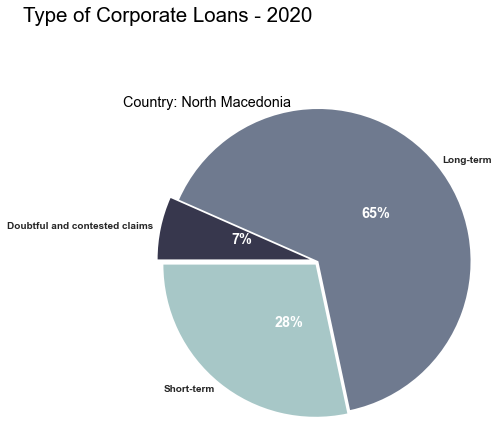

In [49]:
y = np.array([769.14, 1765.15, 179.48])
mylabels = ["Short-term", "Long-term", "Doubtful and contested claims"]

plt.figure(figsize = (3,2))
explode = (0.1, 0.0, 0.2)


labels = mylabels
pal1 = sns.color_palette("bone_r", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Corporate Loans - 2020 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-1.0,-1.5,"28%", color = "white",size = 'x-large',fontweight="demi")
plt.text(1.0,1.0,"65%", color = "white",size = 'x-large',fontweight="demi")
plt.text(-2.0,0.4,"7%", color = "white",size = 'x-large',fontweight="demi")


plt.text(-4.50,3.55,"Country: North Macedonia", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_corporateLoans_2020_mk.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

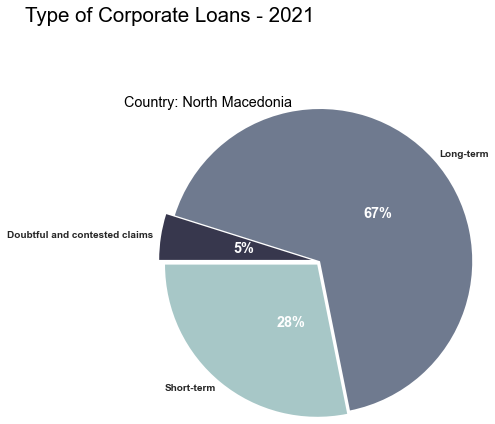

In [50]:
y = np.array([793.91, 1888.91, 137.17])
mylabels = ["Short-term", "Long-term", "Doubtful and contested claims"]

plt.figure(figsize = (3,2))
explode = (0.1, 0.0, 0.2)


labels = mylabels
pal1 = sns.color_palette("bone_r", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Corporate Loans - 2021 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-1.0,-1.5,"28%", color = "white",size = 'x-large',fontweight="demi")
plt.text(1.0,1.0,"67%", color = "white",size = 'x-large',fontweight="demi")
plt.text(-2.0,0.2,"5%", color = "white",size = 'x-large',fontweight="demi")


plt.text(-4.50,3.55,"Country: North Macedonia", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_corporateLoans_2021_mk.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

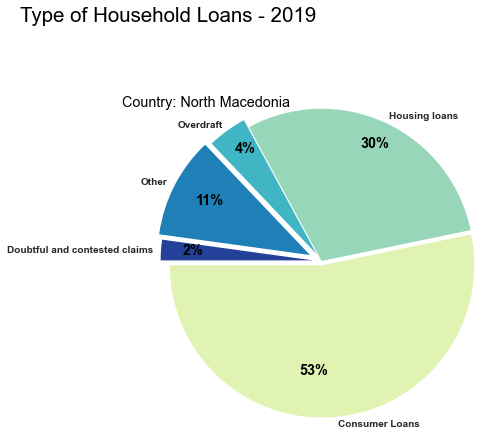

In [51]:
y = np.array([1403.25, 781.44, 110.16,282.78,57.38])
mylabels = ["Consumer Loans", "Housing loans","Overdraft","Other", "Doubtful and contested claims"]

plt.figure(figsize = (3,2))
explode = (0.1, 0.0, 0.2, 0.3, 0.2)


labels = mylabels
pal1 = sns.color_palette('YlGnBu', len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Household Loans - 2019 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-0.5,-2.6,"53%", color = "black",size = 'x-large',fontweight="demi")
plt.text(0.9,2.6,"30%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.0,2.5,"4%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.9,1.3,"11%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-3.2,0.14,"2%", color = "black",size = 'x-large',fontweight="demi")

plt.text(-4.60,3.55,"Country: North Macedonia", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_HouseholdLoans_2019_mk.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

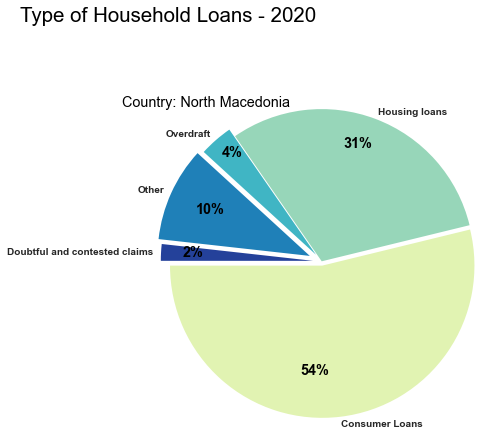

In [52]:
y = np.array([1551.22, 888.65, 102.66,289.28,50.85])
mylabels = ["Consumer Loans", "Housing loans","Overdraft","Other", "Doubtful and contested claims"]

plt.figure(figsize = (3,2))
explode = (0.1, 0.0, 0.2, 0.3, 0.2)


labels = mylabels
pal1 = sns.color_palette('YlGnBu', len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Household Loans - 2020 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-0.5,-2.6,"54%", color = "black",size = 'x-large',fontweight="demi")
plt.text(0.5,2.6,"31%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.3,2.4,"4%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.9,1.1,"10%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-3.2,0.10,"2%", color = "black",size = 'x-large',fontweight="demi")

plt.text(-4.60,3.55,"Country: North Macedonia", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_HouseholdLoans_2020_mk.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

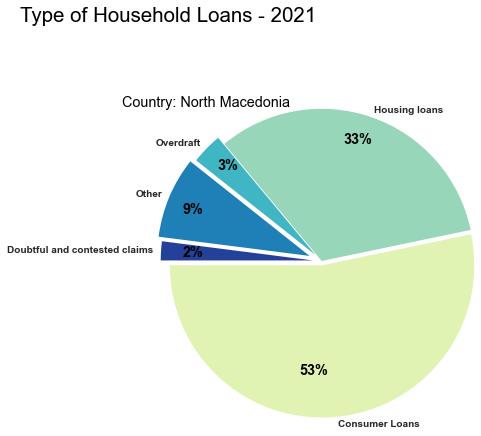

In [53]:
y = np.array([1658.75, 1019.93, 102.76,269.37,62.76])
mylabels = ["Consumer Loans", "Housing loans","Overdraft","Other", "Doubtful and contested claims"]

plt.figure(figsize = (3,2))
explode = (0.1, 0.0, 0.2, 0.3, 0.2)


labels = mylabels
pal1 = sns.color_palette('YlGnBu', len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Household Loans - 2021 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-0.5,-2.6,"53%", color = "black",size = 'x-large',fontweight="demi")
plt.text(0.5,2.7,"33%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.4,2.1,"3%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-3.2,1.1,"9%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-3.2,0.10,"2%", color = "black",size = 'x-large',fontweight="demi")

plt.text(-4.60,3.55,"Country: North Macedonia", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_HouseholdLoans_2021_mk.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()